# Instruction 5 - Neural Networks
(Niklas Adams)

This instruction is split into two parts: First you will implement a small neural network yourself. Subsequently, we will show you how to use a library that already contains an implementation to conduct a classification.

## Simple Neural Network

Let's create a simple neural network. Fill the gaps with the correct variables/values. Our Neural Network has one hidden layer and two inputs. 

In [1]:
import numpy as np
#activation funcion
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

#class of your neural network
class NeuralNetwork:
    
    #set the features of your neural network
    def __init__(self, x, y):
        #set the training input
        self.input      = x
        #randomly assign the weights for the different layers
        self.weights1   = np.random.rand(self.input.shape[1],2) 
        self.weights2   = np.random.rand(2,1) 
        #set the output for the training input set
        self.y          = y
        #add zeros as initial output
        self.output     = np.zeros(self.y.shape)
    #feedforward function 
    def feedforward(self):
         #do the calculation for the input value of neurons in the hidden layer
        hidden_node1 = sigmoid(self.input[0]*self.weights1[0][0]+self.input[1]*self.weights1[0][1])
        hidden_node2 = sigmoid(self.input[0]*self.weights1[1][0]+self.input[1]*self.weights1[1][1])
        #calculate the value of the hidden layer and the output of your network
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output
       #backpropagate the error
    def backprop(self):
        # chain rule to find the derivatives of the error with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, ((self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot((self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # update the weights with the derivative of the error function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        
#test what you have done 
if __name__ == "__main__":
    
    X = np.array([[0,1],
                  [0,1],
                  [1,1],
                  [1,1]])
    y =  np.array([[0],[1],[1],[1]])
    nn = NeuralNetwork(X,y)
    print('Initial weights: ', nn.weights1)

    for i in range(100):
        nn.feedforward()
        nn.backprop()
    print('Difference in the outcome: ', nn.y - nn.output)
    print('Final weights: ', nn.weights1)

Initial weights:  [[0.1332666  0.29096549]
 [0.84163437 0.64714041]]
Difference in the outcome:  [[-0.68146186]
 [ 0.31853814]
 [ 0.18765397]
 [ 0.18765397]]
Final weights:  [[ 0.61664609  1.81254416]
 [ 0.68205038 -0.41991219]]


## Multi-Layer Network

Use the MLPClassifier from scikit learn to construct some neural networks that perform very basic tasks. Make sure that your training actually converges.

### OR Function
Create an MLP classifier for the OR-Function.

In [21]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metric
import numpy as np

#insert here the training data you need for input and output
X_training=[[0,0],[1,0],[0,1],[1,1]]
y_training=[0,1,1,1]
#create the corresponding net with the MLP classifier
mynet = MLPClassifier(hidden_layer_sizes=(2,),max_iter = 5000)
mynet.fit(X_training,y_training)
# What is the output of your classifier for [1,1]?
print(mynet.predict([[1,1]]))

[1]


### Bipolar OR

Instead of {0, 1}, we can also change the value into bipolar {-1, +1}. Try again to create a perceptron using the MLP Classifier for the OR-function with the bipolar output.

In [22]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metric
import numpy as np

#insert here the training data you need for input and output
X_training=[[1, 1], 
            [1, -1],
            [-1, 1],
            [-1, -1]
           ]
y_training=[1, 
            1,
            1,
            -1
           ]
#create the corresponding net with the MLP classifier
mynet = MLPClassifier(hidden_layer_sizes=(2,),max_iter = 5000)
mynet.fit(X_training,y_training)
# What is the output of your classifier for [1,1]?
print(mynet.predict([[1,1]]))

[1]


### XNOR 

Create a XNOR net with 100% accuracy for the training data.

In [11]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metric
import numpy as np
# the needed input
X_training=[[1, 1], 
            [1, 0],
            [0, 1],
            [0, 0]
           ]
y_training=[1, 
            0,
            0,
            0
           ]
# set the method and test until you have accuracy 100%
hidden = 0
accuracy = 0
while (accuracy != 1.0) and  (hidden < 100):
    hidden += 1
    mlp = MLPClassifier(hidden_layer_sizes=(hidden,),max_iter = 5000) 
    mlp.fit(X_training, y_training)                    # training
    y_pred=mlp.predict(X_training)     # show the output
    accuracy  = metric.accuracy_score(np.array(y_training).flatten(), np.array(y_pred).flatten(), normalize=True)
    print("For hidden layer size: "+str(hidden))
    print('Accuracy:'+ " no perfect accuracy " if accuracy != 1.0 else 'Accuracy:'+ " perfect accuracy")
    print("_______________")

For hidden layer size: 1
Accuracy: no perfect accuracy 
_______________
For hidden layer size: 2
Accuracy: perfect accuracy
_______________


In [12]:
print('Accuracy=',accuracy)                         # show the accuracy score
print('Number of hidden layers: ', hidden)

print([coef.shape for coef in mlp.coefs_])  # size of synapsis weights
print(len(mlp.coefs_))                                  # synapsis weights

Accuracy= 1.0
Number of hidden layers:  2
[(2, 2), (2, 1)]
2


## An Example of Classification with a Neural Network using scikit learn

The data set is made of 8x8 images of digits. We start with loading the dataset.

In [32]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn import tree

# The digits dataset
digits = datasets.load_digits()

Now, let's have a look at some of the first images, stored in the images attribute of the dataset.
-  If we were working from image files, we could load them using matplotlib.pyplot.imread. Note that each image must have the same size. 
-  For these images, we know which digit they represent: it is given in the 'target' of the dataset.


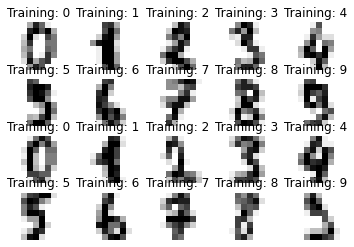

In [33]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(4, 5, index + 1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r)
    plt.title('Training: %i' % label)
plt.show()

In [34]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Next, let's see what our classification algorithms does:

In [35]:
# Create a classifier: 

classifier = MLPClassifier(hidden_layer_sizes=(100,))

# We learn the digits on the first half of the digits
classifier.fit(data[:9*(n_samples) // 10], digits.target[:9*(n_samples) // 10])

# Now predict the value of the digit on the second half:
expected = digits.target[9*(n_samples) // 10:]
predicted = classifier.predict(data[9*(n_samples) // 10:])


Lets show the predictions:

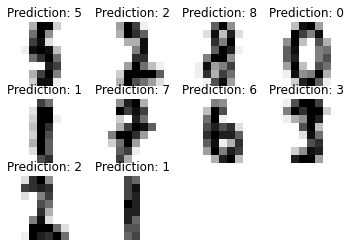

In [36]:
images_and_predictions = list(zip(digits.images[9*(n_samples) // 10:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(3, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Prediction: %i' % prediction)

plt.show()

Evaluation metrics can be used to compare your classifications:

In [37]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        17
           3       1.00      0.78      0.88        18
           4       1.00      0.95      0.97        20
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       0.76      0.94      0.84        17
           9       0.94      0.89      0.91        18

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180


Confusion matrix:
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  4  0]
 [ 0  0  0  0 19  0  0  0  0  1]
 [ 